<a href="https://colab.research.google.com/github/bnv20/cakd3/blob/main/%ED%95%9C%EA%B8%80wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 나눔 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,035 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 148492 files and d

In [ ]:
# 런타임 다시 시작

In [1]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')
my_path = '/content/notebooks'
os.symlink('/content/drive/My Drive/Colab Notebooks', my_path)
sys.path.insert(0,my_path)

Mounted at /content/drive


In [ ]:
!pip install "jpype1<1"
!pip install konlpy

In [2]:
import pandas as pd
from konlpy.tag import Okt
import re

okt = Okt()

with open('/content/drive/MyDrive/cakd3_colab/textmining/dataset/영화 기생충_review.txt','r',
          encoding = 'cp949') as file:
          text = file.read()
          print(text)


별1개  준 사람들은   나베당임
역쉬
영화가 끝나고 가슴이 먹먹하고 답답햇습니다 너무나 충격적이었습니다..
지금까지 나온 감독의 모든 작품이 압축되어있다는 느낌을 받음.  Bomb!!!
대단한 영화. 몰입력 장난아님. 후아
그닥
칸하고 안맞나봄.
봉준호식의 코메디와 사회비판 페이소스
좋았습니다
군더더기 없이 깔끔한 영화, 지금도 영화가 주는 메세지를 생각하는 중입니다
볼만 했어요
막 조조보고 나옴. 기가 막힌 블랙코미디. 시간 가는줄 모르고 집중하게 됨..보고 나서 더 생각나는 영화.여지껏 봉준호 영화 중 최고다
전  재미었어요.생각 하게끔 만드는 영화
올만에 한국영화 강추
영화가 끝나고 생각함을 주는영화
이건 진짜 봉준호 천재~~
김태호 무한도전보고 천재라  생각했는데..
다른분야 같은 레벨~!!
더불어 살 순 없을까 ㅠㅠ
블랙코미디 굉장히 찝찝하고 숙연해진다
나름
몰입!
기대하고 갔는데
개인적으로 별로다 
불편하다
시간가는 줄 모르고 정말 재밌게 봤습니다.
풍자를 기가막히게 잘 표현한 것 같습니다.
아마 2019년 최고작
송강호 나오면 무조건 보는데 역시나 믿고 보는 배우 역시 한국인들 대단해 방탄에 이어 영화까지 세계인의 마음을 사로잡다
good
일반국민이던  배충이던  모두봐야할  영화
칸영화제 수상과는 별개로...... 개인적으로 영화가 끝나고 기립박수를 치고 싶었습니다
봉준호 감독님에게 경의를 표하고 싶습니다.
당장은 어렵더라도. 기우의 바램이 이루어지는 세상을 향해.
뉴스로 닿지 않을 것을 전달해내는 과연 봉테일.
묵직하게. 잘 받았습니다, 오버.
두번 다시 봉준호 영화는 거른다..!!
재밌어요~
재미있고 상징적인 상업영화인데
행위예술같은 고급스러움도 있어요~
물론 반지하 장면은 좀 지저분하지만
그게 현실이니까
너무 재밌게 봤고 두번은 더 볼꺼예요~♡♡
오랜만에 잘 만들어진 영화를 봤네요~.
대사 중에 불필요한 ㅇㅅ이 많아서 아쉬웠음
글쎄..........
503  최순실 잔당이 블랙리스트로 말려 죽이려한 감독과 대배우. 그들에게 최고의 명예를 

In [3]:
def cleanText(readData):
  text = re.sub('[0-9]+','',readData)
  text = re.sub('[A-Za-z]+','',text)
  text = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ·!』\\‘’|\(\)\[\]\<\>`\'…》]','',text)
  return text
text = cleanText(text)

morph = okt.pos(text)
word_list = []
for word, tag in morph:
  if (tag == 'Noun') | (tag == 'Verb') | (tag == 'Adjective'):
    word_list.append(word)
print(word_list)

['별개', '준', '사람', '나', '베당', '임', '역쉬', '영화', '끝나고', '가슴', '먹', '먹하고', '답답햇습니', '충격', '이었습니다', '지금', '나온', '감독', '모든', '작품', '압축', '되어있다는', '느낌', '받음', '대단한', '영화', '몰입', '장난', '아님', '후', '그닥', '칸', '맞나', '봄', '봉준호', '코메디', '사회', '비판', '페이소스', '좋았습니다', '군더더기', '깔끔한', '영화', '지금', '영화', '주는', '메세지', '생각', '하는', '중', '입니다', '볼', '했어요', '막', '조조', '보고', '나옴', '기', '막힌', '블랙코미디', '시간', '가는줄', '모르고', '집중', '하게', '됨', '보고', '나서', '더', '생각나는', '영화', '여지', '껏', '봉준호', '영화', '중', '최고다', '전', '재', '미었어요', '생각', '하게', '끔', '만드는', '영화', '올만에', '한국영', '강추', '영화', '끝나고', '생각', '함', '주는', '영화', '이건', '진짜', '봉준호', '천재', '김태호', '무한도전', '보고', '천재', '생각', '했는데', '분야', '같은', '레벨', '더불어', '살', '순', '없을까', '블랙코미디', '굉장히', '찝찝하고', '숙연', '해진다', '나름', '몰입', '기대하고', '갔는데', '개인', '별로', '불편하다', '시간', '가는', '줄', '모르고', '정말', '재밌게', '봤습니다', '풍자', '기', '막히게', '잘', '표현', '것', '같습니다', '아마', '년', '최고', '작', '송강호', '나오면', '무조건', '보는데', '역시', '믿고', '보는', '배우', '역시', '한국', '대단해', '방탄', '이어', '영화', '세계', '마음', '사로잡다', '국민',

In [4]:
from collections import Counter
count = Counter(word_list)
n_words = dict(count.most_common())
n_words

{'영화': 497,
 '봉준호': 138,
 '감독': 126,
 '생각': 122,
 '하는': 78,
 '기생충': 78,
 '것': 72,
 '연기': 66,
 '그': 65,
 '잘': 64,
 '보고': 60,
 '송강호': 60,
 '현실': 57,
 '배우': 54,
 '기대': 54,
 '작품': 53,
 '사람': 51,
 '역시': 48,
 '이': 48,
 '없는': 48,
 '더': 47,
 '최고': 47,
 '장면': 47,
 '상': 46,
 '하게': 45,
 '수': 45,
 '우리': 44,
 '봉': 41,
 '황금종려상': 41,
 '점': 40,
 '있는': 39,
 '사회': 37,
 '시간': 37,
 '왜': 37,
 '느낌': 36,
 '칸': 36,
 '정말': 35,
 '스토리': 35,
 '좀': 34,
 '냄새': 34,
 '나': 32,
 '보는': 32,
 '합니다': 32,
 '재미': 32,
 '부자': 31,
 '말': 31,
 '입니다': 30,
 '할': 30,
 '꼭': 29,
 '볼': 28,
 '모두': 28,
 '이선균': 28,
 '그냥': 27,
 '가족': 27,
 '축하': 27,
 '인간': 27,
 '듯': 27,
 '여운': 27,
 '집': 27,
 '같은': 26,
 '조여정': 26,
 '진짜': 25,
 '다시': 25,
 '함': 24,
 '한국': 24,
 '때': 24,
 '돈': 24,
 '몰입': 23,
 '해': 23,
 '한번': 23,
 '임': 22,
 '좋은': 22,
 '많은': 22,
 '봤어요': 22,
 '또': 22,
 '이해': 21,
 '끝나고': 20,
 '지금': 20,
 '봤습니다': 20,
 '만든': 19,
 '한다': 19,
 '대한': 19,
 '장르': 19,
 '못': 19,
 '관객': 19,
 '내용': 19,
 '마지막': 19,
 '되는': 19,
 '마음': 18,
 '수상': 18,
 '정도': 18,
 '내내'

In [5]:
data = pd.Series(n_words)
df = pd.DataFrame(data,columns=['cnt'])
df10 = df.sort_values(by='cnt',ascending=False).head(10)
df10

,cnt
영화,497
봉준호,138
감독,126
생각,122
하는,78
기생충,78
것,72
연기,66
그,65
잘,64


In [6]:
df10.reset_index(inplace=True)
df10.head()

,index,cnt
0,영화,497
1,봉준호,138
2,감독,126
3,생각,122
4,하는,78


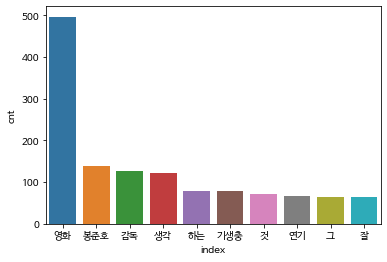

In [7]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

plt.rc('font',family='NanumBarunGothic')
sns.barplot(x='index',y='cnt',data=df10, orient='v')

In [8]:
def cleanText(readData):
  text = re.sub('[0-9]+','',readData)
  text = re.sub('[A-Za-z]+','',text)
  text = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ·!』\\‘’|\(\)\[\]\<\>`\'…》]','',text)
  return text
text = cleanText(text)

morph = okt.pos(text)
noun_list = []
for word, tag in morph:
  if tag == 'Noun':
    noun_list.append(word)
print(noun_list)

['별개', '준', '사람', '나', '임', '역쉬', '영화', '가슴', '답답햇습니', '충격', '지금', '감독', '모든', '작품', '압축', '느낌', '영화', '몰입', '장난', '후', '그닥', '칸', '봄', '봉준호', '코메디', '사회', '비판', '페이소스', '군더더기', '영화', '지금', '영화', '메세지', '생각', '중', '볼', '막', '조조', '보고', '기', '블랙코미디', '시간', '집중', '보고', '더', '영화', '여지', '껏', '봉준호', '영화', '중', '최고다', '전', '재', '생각', '영화', '한국영', '강추', '영화', '생각', '함', '영화', '이건', '진짜', '봉준호', '천재', '김태호', '무한도전', '보고', '천재', '생각', '분야', '레벨', '살', '순', '블랙코미디', '숙연', '나름', '몰입', '개인', '별로', '시간', '줄', '정말', '풍자', '기', '표현', '것', '아마', '년', '최고', '작', '송강호', '무조건', '역시', '배우', '역시', '한국', '방탄', '영화', '세계', '마음', '국민', '배충', '모두', '영화', '칸영화제', '수상', '별개', '개인', '영화', '기립박수', '봉준호', '감독', '경의', '표', '당장', '기우', '바램', '세상', '향', '뉴스', '것', '전달', '과연', '봉테일', '오버', '번', '다시', '봉준호', '영화', '거른다', '상징', '상업', '영화', '행위예술', '움', '반지하', '장면', '좀', '그게', '현실', '번은', '더', '만', '영화', '대사', '중', '이', '글쎄', '최', '실', '잔당', '블랙리스트', '감독', '배우', '그', '최고', '명예', '세계', '영화제', '이제', '잔당', '세계', '영화계', '종북'

In [9]:
from collections import Counter
count = Counter(noun_list)
words = dict(count.most_common())
words

{'영화': 497,
 '봉준호': 138,
 '감독': 126,
 '생각': 122,
 '기생충': 78,
 '것': 72,
 '연기': 66,
 '그': 65,
 '보고': 60,
 '송강호': 60,
 '현실': 57,
 '배우': 54,
 '기대': 54,
 '작품': 53,
 '사람': 51,
 '역시': 48,
 '이': 48,
 '더': 47,
 '최고': 47,
 '장면': 47,
 '상': 46,
 '수': 45,
 '우리': 44,
 '봉': 41,
 '황금종려상': 41,
 '점': 40,
 '사회': 37,
 '시간': 37,
 '왜': 37,
 '느낌': 36,
 '칸': 36,
 '정말': 35,
 '스토리': 35,
 '좀': 34,
 '냄새': 34,
 '재미': 32,
 '나': 31,
 '부자': 31,
 '말': 31,
 '꼭': 29,
 '볼': 28,
 '모두': 28,
 '이선균': 28,
 '그냥': 27,
 '가족': 27,
 '축하': 27,
 '인간': 27,
 '듯': 27,
 '여운': 27,
 '집': 27,
 '조여정': 26,
 '진짜': 25,
 '다시': 25,
 '한국': 24,
 '때': 24,
 '돈': 24,
 '몰입': 23,
 '한번': 23,
 '임': 22,
 '함': 22,
 '또': 22,
 '이해': 21,
 '지금': 20,
 '대한': 19,
 '장르': 19,
 '못': 19,
 '관객': 19,
 '내용': 19,
 '마지막': 19,
 '마음': 18,
 '수상': 18,
 '정도': 18,
 '내내': 18,
 '부분': 18,
 '끝': 18,
 '내': 18,
 '하나': 18,
 '관람': 17,
 '삶': 17,
 '뭐': 17,
 '계획': 17,
 '가지': 17,
 '저': 17,
 '기분': 17,
 '감': 17,
 '때문': 17,
 '가슴': 16,
 '줄': 16,
 '풍자': 16,
 '영화제': 16,
 '살인': 16,
 '괴물': 16,
 '속

In [ ]:
!pip install wordcloud

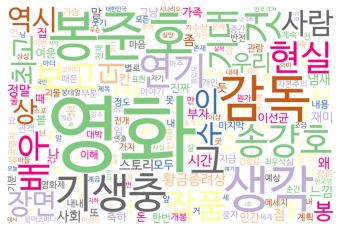

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', background_color = 'white',
                      colormap = 'Accent_r', width=1500, height=1000).generate_from_frequencies(words)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
# NanumSquareR.ttf